In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

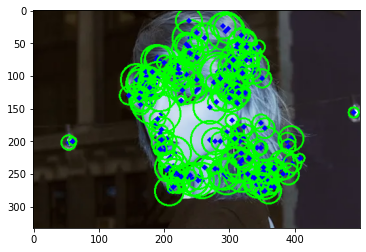

In [2]:
img = cv2.imread('taylor.jpg', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=5, maxRadius=30)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

imgplot = plt.imshow(img)
plt.show()      

In [3]:
import cv2
import numpy as np

# Read image
image = cv2.imread('taylor.jpg')

# Convert image to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)

# Apply HoughLinesP method to
# to directly obtain line end points
lines_list =[]
lines = cv2.HoughLinesP(
			edges, # Input edge image
			1, # Distance resolution in pixels
			np.pi/180, # Angle resolution in radians
			threshold=100, # Min number of votes for valid line
			minLineLength=5, # Min allowed length of line
			maxLineGap=10 # Max allowed gap between line for joining them
			)

# Iterate over points
for points in lines:
	# Extracted points nested in the list
	x1,y1,x2,y2=points[0]
	# Draw the lines joing the points
	# On the original image
	cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
	# Maintain a simples lookup list for points
	lines_list.append([(x1,y1),(x2,y2)])
	
# Save the result image
#cv2.imwrite('detectedLines.png',image)


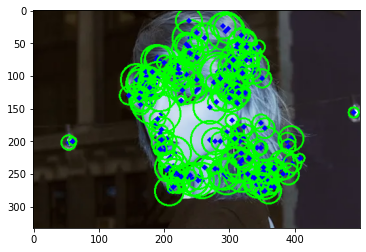

In [4]:
imgplot = plt.imshow(img)
plt.show()  

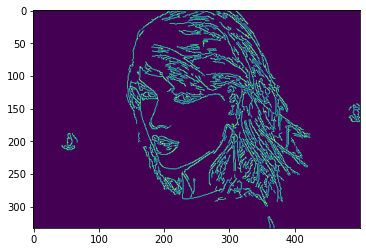

In [5]:
import cv2
import numpy as np

img = cv2.imread('taylor.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


edges = cv2.Canny(gray,100,200,apertureSize = 3)
imgplot = plt.imshow(edges)
plt.show() 

In [6]:
minLineLength = 30
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

#cv2.imshow('hough',img)
#cv2.waitKey(0)

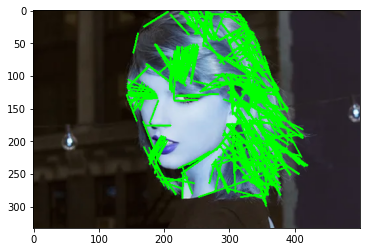

In [7]:
imgplot = plt.imshow(img)
plt.show()